In [54]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix, classification_report

In [55]:
# Read the cleaned CSV file into a Pandas DataFrame
file_path = Path("Diabetes_Prediction_Clean.csv")
df_diabetes_data = pd.read_csv(file_path)
# Review the DataFrame
df_diabetes_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Male,28.0,0,0,never,27.32,5.7,158,0
2,Female,36.0,0,0,current,23.45,5.0,155,0
3,Male,76.0,1,1,current,20.14,4.8,155,0
4,Female,20.0,0,0,never,27.32,6.6,85,0


In [56]:
df_diabetes_data = pd.get_dummies(df_diabetes_data)

In [57]:
df_diabetes_data.shape

(60180, 13)

In [58]:
# Separate the data into labels and targets

# Separate the y variable, the target
y = df_diabetes_data["diabetes"]

# Separate the X variable, the labels
X = df_diabetes_data.drop(columns= ["diabetes","HbA1c_level"])

In [59]:
# Review the y variable Series
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
60175    0
60176    0
60177    0
60178    0
60179    0
Name: diabetes, Length: 60180, dtype: int64


In [60]:
# Review the X variable DataFrame
X

,age,hypertension,heart_disease,bmi,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_current,smoking_history_former,smoking_history_never
0,80.0,0,1,25.19,140,1,0,0,0,0,1
1,28.0,0,0,27.32,158,0,1,0,0,0,1
2,36.0,0,0,23.45,155,1,0,0,1,0,0
3,76.0,1,1,20.14,155,0,1,0,1,0,0
4,20.0,0,0,27.32,85,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
60175,26.0,0,0,34.34,160,1,0,0,0,0,1
60176,40.0,0,0,40.69,155,1,0,0,0,0,1
60177,66.0,0,0,27.83,155,0,1,0,0,1,0
60178,24.0,0,0,35.42,100,1,0,0,0,0,1


In [61]:
# Check the balance of our target values
y.value_counts()

0    53606
1     6574
Name: diabetes, dtype: int64

In [62]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   random_state=1,
                                                   stratify=y)

In [63]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
classifier = LogisticRegression(solver='lbfgs', random_state=1, max_iter=2000)

# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=1)

In [64]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
results.head()

,Prediction,Actual
10326,0,1
46877,0,0
57182,1,1
53522,0,0
48405,0,0


In [65]:
# Print the balanced_accuracy score of the model
balanced_accuracy = balanced_accuracy_score(y_test, predictions)
print(f"Balanced Accuracy Score : {balanced_accuracy}")

Balanced Accuracy Score : 0.7128535047771247


In [66]:
# Generate a confusion matrix for the model
c_matrix = confusion_matrix(y_test, predictions)
c_matrix_df = pd.DataFrame(
    c_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

print("Confusion Matrix")
display(c_matrix_df)

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,13245,156
Actual 1,925,719


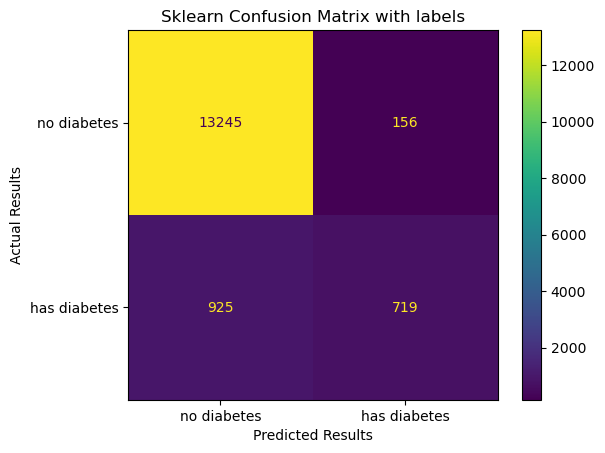

In [67]:
# Visual the Confusion Matrix using ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cmd_obj = ConfusionMatrixDisplay(c_matrix, display_labels=['no diabetes', 'has diabetes'])
cmd_obj.plot()
cmd_obj.ax_.set(
                title='Sklearn Confusion Matrix with labels', 
                xlabel='Predicted Results', 
                ylabel='Actual Results')
plt.show()

In [68]:
# Print the classification report for the model
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     13401
           1       0.82      0.44      0.57      1644

    accuracy                           0.93     15045
   macro avg       0.88      0.71      0.77     15045
weighted avg       0.92      0.93      0.92     15045



In [69]:
# Print accuracy report for Confusion Matrix
print("Accuracy Score")
print(accuracy_score(y_test, predictions))

Accuracy Score
0.9281488866733134


In [70]:
#########Oversampling Method##################:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

#Initiating random oversampler model:

## assigning random state one to the model:
ros = RandomOverSampler(sampling_strategy= .3, random_state=1)

# Fit the original training data to the random_oversampler model
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)



In [71]:
#Counting the distinct values of resampled labels:
y_resampled.value_counts()


0    40205
1    12061
Name: diabetes, dtype: int64

In [72]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier_ros = LogisticRegression(solver = 'lbfgs',
                                 max_iter = 200,
                                 random_state = 1
                                )

#Fit the model using the resampled training data
classifier_ros.fit(X_resampled, y_resampled)


#Prediction code
predictions_ros = classifier_ros.predict(X_resampled)
results_ros = pd.DataFrame({'Predictions': predictions, 'Actual': y_test}).reset_index(drop = True)
results_ros.head(10)


,Predictions,Actual
0,0,1
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,1,0
9,0,0


In [73]:
#Printing balanced accuracy score
balanced_accuarcy_ros = accuracy_score(y_resampled, predictions_ros)
balanced_accuarcy_ros

0.8552405005165882

In [74]:
#Confusion Matrix

cm_ros = confusion_matrix(y_resampled, predictions_ros)

cm_df_ros = pd.DataFrame(
    cm_ros, index = ['Actual 0 ', 'Actual 1'], columns = ['Predicted 0','Predicted 1']
)

cm_df_ros

,Predicted 0,Predicted 1
Actual 0,38209,1996
Actual 1,5570,6491


In [75]:
print(classification_report(y_resampled, predictions_ros))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     40205
           1       0.76      0.54      0.63     12061

    accuracy                           0.86     52266
   macro avg       0.82      0.74      0.77     52266
weighted avg       0.85      0.86      0.85     52266



In [76]:
##########Test Code ##################
from sklearn.linear_model import LogisticRegression

coeff = classifier_ros.coef_[0]
absolute_coefficients = abs(coeff)




In [77]:
absolute_coefficients

array([0.04889037, 0.74061915, 0.76167939, 0.08719217, 0.0311956 ,
       3.28630224, 2.94779874, 0.02378087, 1.96441851, 2.144738  ,
       2.14872534])

In [78]:
#
Column_name = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'gender_Female', 'gender_Male', 'gender_Other',
       'smoking_history_current', 'smoking_history_former',
       'smoking_history_never']

feature_coefficients = list(zip(Column_name, coeff))
feature_coefficients.sort(key=lambda x: x[1], reverse=True)

feature_coefficients

[('heart_disease', 0.761679386132625),
 ('hypertension', 0.7406191483334622),
 ('bmi', 0.0871921705847433),
 ('age', 0.04889037031963427),
 ('HbA1c_level', 0.031195597457767805),
 ('gender_Male', -0.023780867618713862),
 ('gender_Other', -1.9644185122408473),
 ('smoking_history_current', -2.144738004915885),
 ('smoking_history_former', -2.148725336241697),
 ('gender_Female', -2.947798742338222),
 ('blood_glucose_level', -3.2863022434498874)]

In [79]:
for feature, coefficient in feature_coefficients:
    print(f"Feature: {feature}, Coefficient: {round(coefficient,2)}")

Feature: heart_disease, Coefficient: 0.76
Feature: hypertension, Coefficient: 0.74
Feature: bmi, Coefficient: 0.09
Feature: age, Coefficient: 0.05
Feature: HbA1c_level, Coefficient: 0.03
Feature: gender_Male, Coefficient: -0.02
Feature: gender_Other, Coefficient: -1.96
Feature: smoking_history_current, Coefficient: -2.14
Feature: smoking_history_former, Coefficient: -2.15
Feature: gender_Female, Coefficient: -2.95
Feature: blood_glucose_level, Coefficient: -3.29


In [80]:
coeff_standard = classifier.coef_[0]
absolute_coefficients_standard = abs(coeff_standard)



Column_name = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'gender_Female', 'gender_Male', 'gender_Other',
       'smoking_history_current', 'smoking_history_former',
       'smoking_history_never']

feature_coefficients = list(zip(Column_name, coeff_standard))
feature_coefficients.sort(key=lambda x: x[1], reverse=True)

feature_coefficients


[('hypertension', 0.7351064846376711),
 ('heart_disease', 0.7136006476052884),
 ('bmi', 0.08651350921549077),
 ('age', 0.047927288590398326),
 ('HbA1c_level', 0.032596816333865596),
 ('gender_Female', -0.13355697468716696),
 ('blood_glucose_level', -0.43941134953356115),
 ('gender_Other', -0.9072452084026037),
 ('smoking_history_current', -1.053783806019743),
 ('smoking_history_former', -1.0861969496723332),
 ('gender_Male', -2.4742576400769885)]